<a href="https://colab.research.google.com/github/polaroidz/polaroidz/blob/main/Statistics_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

In [2]:
library(ggplot2)
library(dplyr)
data(msleep)

In [ ]:
glimpse(msleep)

Rows: 83
Columns: 11
$ name         <chr> "Cheetah", "Owl monkey", "Mountain beaver", "Greater shor…
$ genus        <chr> "Acinonyx", "Aotus", "Aplodontia", "Blarina", "Bos", "Bra…
$ vore         <chr> "carni", "omni", "herbi", "omni", "herbi", "herbi", "carn…
$ order        <chr> "Carnivora", "Primates", "Rodentia", "Soricomorpha", "Art…
$ conservation <chr> "lc", NA, "nt", "lc", "domesticated", NA, "vu", NA, "dome…
$ sleep_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5…
$ sleep_rem    <dbl> NA, 1.8, 2.4, 2.3, 0.7, 2.2, 1.4, NA, 2.9, NA, 0.6, 0.8, …
$ sleep_cycle  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, N…
$ awake        <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 1…
$ brainwt      <dbl> NA, 0.01550, NA, 0.00029, 0.42300, NA, NA, NA, 0.07000, 0…
$ bodywt       <dbl> 50.000, 0.480, 1.350, 0.019, 600.000, 3.850, 20.490, 0.04…


In [ ]:
mean(msleep$sleep_total)

[1] 10.43373

In [ ]:
median(msleep$sleep_total)

[1] 10.1

In [ ]:
msleep %>% count(sleep_total, sort = TRUE) %>% head(5)

sleep_total n
1 12.5        4
2 10.1        3
3  5.3        2
4  6.3        2
5  8.4        2

In [ ]:
# Used in categorical variables
msleep %>% count(vore, sort = TRUE)

vore    n 
1 herbi   32
2 omni    20
3 carni   19
4 NA       7
5 insecti  5

In [ ]:
msleep %>%
  filter(vore == "insecti") %>%
  summarize(mean_sleep = mean(sleep_total),
            median_sleep = median(sleep_total))

mean_sleep median_sleep
1 14.94      18.1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



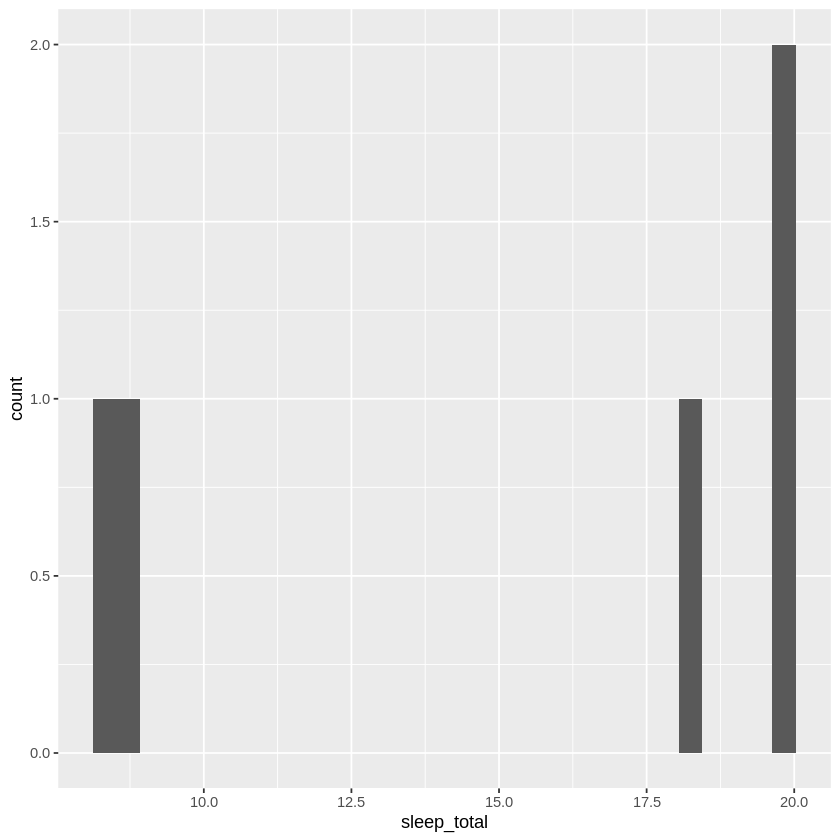

In [ ]:
msleep %>%
  filter(vore == "insecti") %>%
  ggplot(aes(sleep_total)) +
    geom_histogram()

In [ ]:
var(msleep$sleep_total)

[1] 19.80568

In [ ]:
sd(msleep$sleep_total)

[1] 4.450357

In [ ]:
mad(msleep$sleep_total)

[1] 5.04084

In [ ]:
quantile(msleep$sleep_total)

0%   25%   50%   75%  100% 
 1.90  7.85 10.10 13.75 19.90

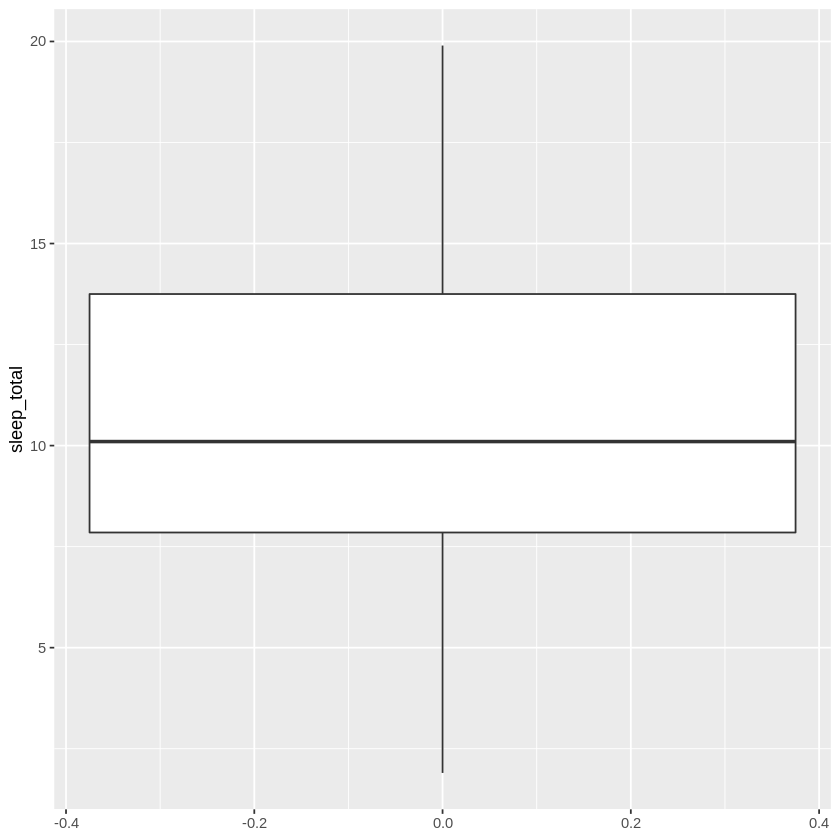

In [ ]:
ggplot(msleep, aes(y = sleep_total)) +
  geom_boxplot()

In [ ]:
quantile(msleep$sleep_total, probs = c(0, 0.2, 0.4, 0.6, 0.8, 1))

0%   20%   40%   60%   80%  100% 
 1.90  6.24  9.48 11.14 14.40 19.90

In [ ]:
seq(0, 1, 0.2)

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [ ]:
# IQR
quantile(msleep$sleep_total, 0.75) - quantile(msleep$sleep_total, 0.25)

75% 
5.9

In [ ]:
# Finding Outliers
iqr <- quantile(msleep$bodywt, 0.75) - quantile(msleep$bodywt, 0.25)

lower_threshold <- quantile(msleep$bodywt, 0.25) - 1.5*iqr 
upper_threshold <- quantile(msleep$bodywt, 0.75) + 1.5*iqr 

msleep %>%
  filter(bodywt < lower_threshold | bodywt > upper_threshold) %>%
  select(name, vore, sleep_total, bodywt) %>%
  head(5) # outliers

name           vore  sleep_total bodywt  
1 Cow            herbi 4.0          600.000
2 Asian elephant herbi 3.9         2547.000
3 Horse          herbi 2.9          521.000
4 Donkey         herbi 3.1          187.000
5 Giraffe        herbi 1.9          899.995

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



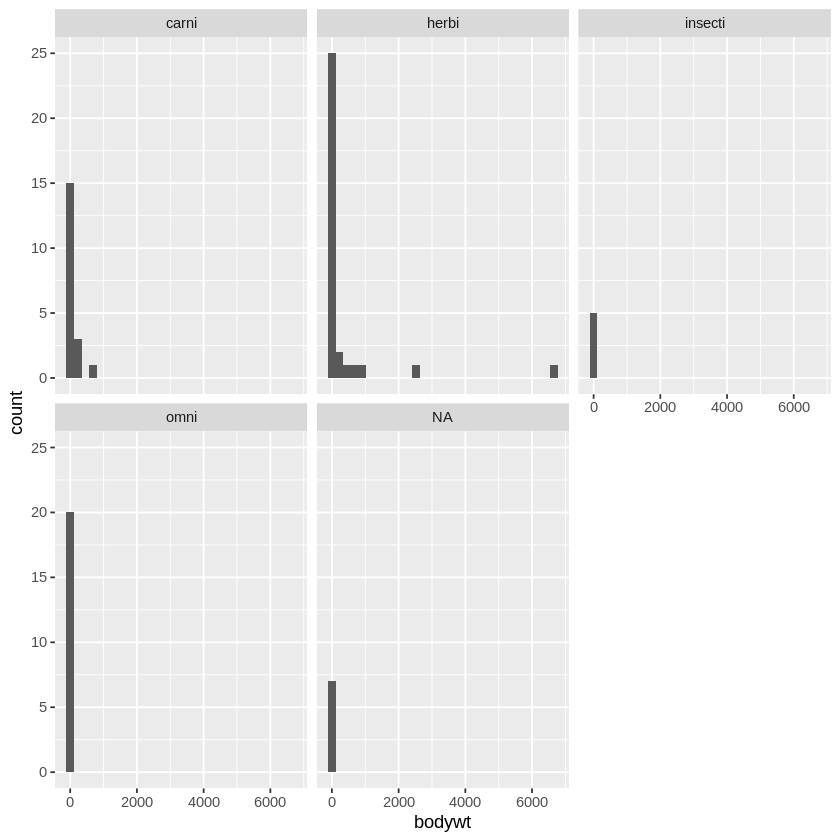

In [ ]:
ggplot(msleep, aes(x = bodywt)) +
  geom_histogram() +
  facet_wrap(~vore)

In [6]:
set.seed(42)
msleep %>%
  sample_n(1)

name  genus vore  order        conservation sleep_total sleep_rem sleep_cycle
1 Sheep Ovis  herbi Artiodactyla domesticated 3.8         0.6       NA         
  awake brainwt bodywt
1 20.2  0.175   55.5

In [7]:
set.seed(42)
# Sampling without replacement in R
msleep %>%
  sample_n(1, replace = FALSE) # default

name  genus vore  order        conservation sleep_total sleep_rem sleep_cycle
1 Sheep Ovis  herbi Artiodactyla domesticated 3.8         0.6       NA         
  awake brainwt bodywt
1 20.2  0.175   55.5

In [10]:
set.seed(41)
# Sampling with replacement in R
msleep %>%
  sample_n(3, replace = TRUE)

name           genus        vore  order        conservation sleep_total
1 Golden hamster Mesocricetus herbi Rodentia     en           14.3       
2 Mongoose lemur Lemur        herbi Primates     vu            9.5       
3 Cow            Bos          herbi Artiodactyla domesticated  4.0       
  sleep_rem sleep_cycle awake brainwt bodywt
1 3.1       0.2000000    9.7  0.001     0.12
2 0.9              NA   14.5     NA     1.67
3 0.7       0.6666667   20.0  0.423   600.00

In [14]:
die <- c(1,2,3,4,5,6)
die <- data.frame(die)
die

die
1 1  
2 2  
3 3  
4 4  
5 5  
6 6

In [15]:
rolls_10 <- die %>%
  sample_n(10, replace = TRUE)

rolls_10

die
1  6  
2  2  
3  5  
4  6  
5  6  
6  2  
7  2  
8  3  
9  6  
10 5

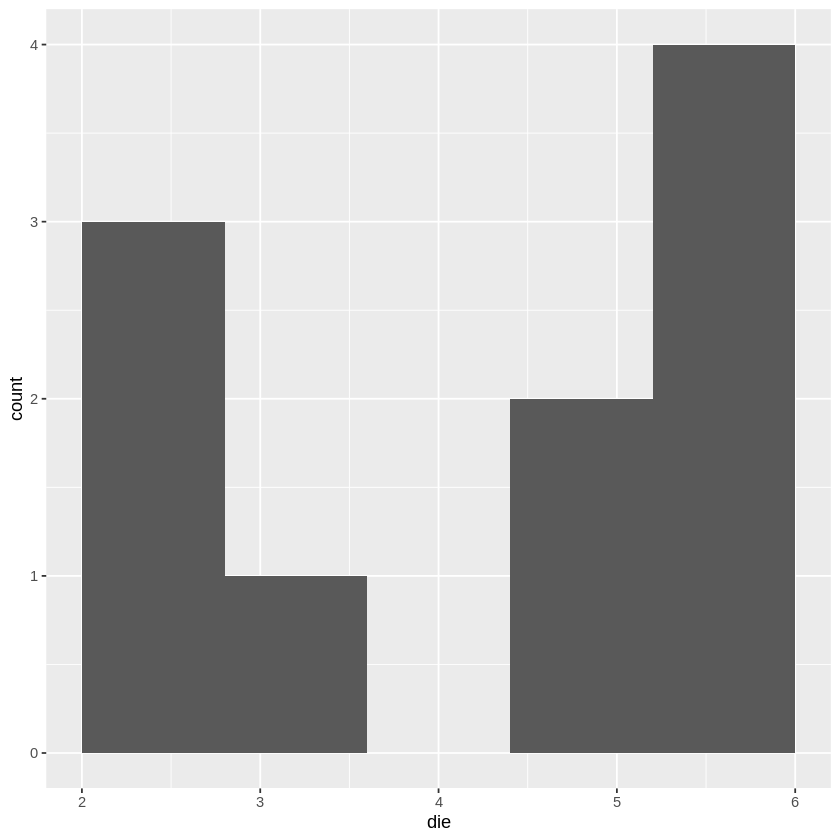

In [16]:
ggplot(rolls_10, aes(die)) +
  geom_histogram(bins = 6)

In [20]:
mean(die$die)

[1] 3.5

In [21]:
mean(rolls_10$die)

[1] 4.3

In [22]:
# P (<=7)
punif(7, min = 0, max = 12)

[1] 0.5833333

In [23]:
# P (>=7)
1 - punif(7, min = 0, max = 12)

[1] 0.4166667

In [24]:
# P (>=7)
punif(7, min = 0, max = 12, lower.tail = FALSE)

[1] 0.4166667

In [25]:
# P(4 <= x <= 7)
punif(7, min = 0, max = 12) - punif(4, min = 0, max = 12)

[1] 0.25